In [24]:
import scipy as sp
import numpy as np
from scipy import stats
from scipy.stats import norm
from ipykernel import kernelapp as app
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [5]:
# binomial test 
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [6]:
sp.stats.binom_test(n, N)

0.34374999999999989

In [7]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [8]:
sp.stats.binom_test(n,N)

0.92041076261282062

In [10]:
# Chi-square test (세타 = 0.25, 0,25, 0,25, 0,25)
N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K,N,p=theta_0)
n = np.bincount(x,minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [11]:
sp.stats.chisquare(n) # 귀무가설 채택

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

In [12]:
# One-sample z-test
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [23]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))
ztest_lsamp(x)

(inf, 0.0)

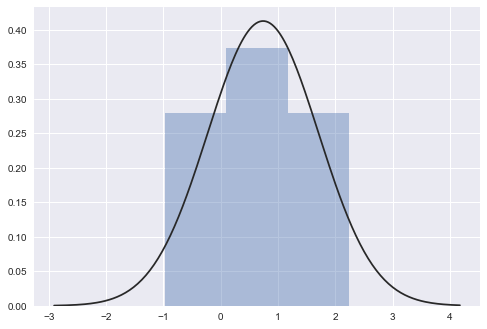

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

In [2]:
# 단일표본 t검정
import seaborn as sns
import matplotlib.pyplot as plt

N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)

plt.show()
sp.stats.ttest_1samp(x, popmean=0)

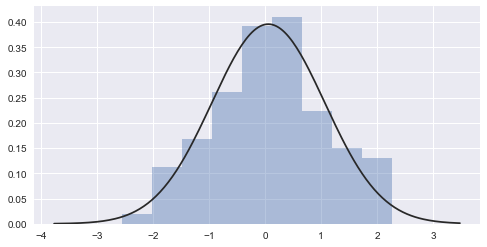

Ttest_1sampResult(statistic=0.59042834028516977, pvalue=0.55624891586946745)

In [71]:
# 단일표본 Z검정
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
sp.stats.ttest_1samp(x, popmean=0)

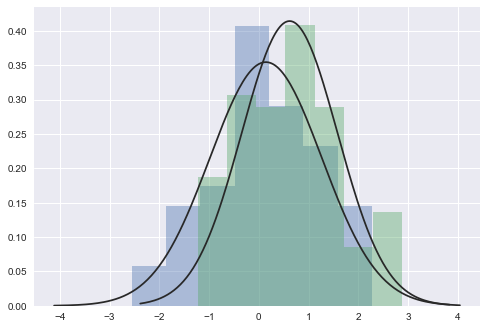

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.0081339709157226582)

In [12]:
# 독립표본 t검정
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1= sp.stats.norm(mu_1,sigma_1).rvs(N_1)
x2= sp.stats.norm(mu_2,sigma_2).rvs(N_2)

sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
sp.stats.ttest_ind(x1, x2, equal_var=True)

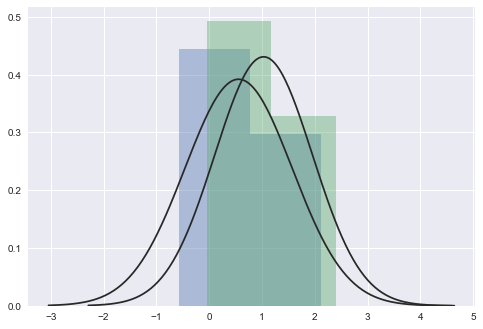

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

In [14]:
# 대응 표본 t검정
N=5
mu_1 = 0
mu_1 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

sns.distplot(x1,kde=False,fit=sp.stats.norm)
sns.distplot(x2,kde=False,fit=sp.stats.norm)
plt.show()
sp.stats.ttest_rel(x1, x2)

In [21]:
# 카이제곱 분산검정
def chi2var_test(x,sigma2=1):
    v = x.var(ddof=1)
    t = (len(x)-1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

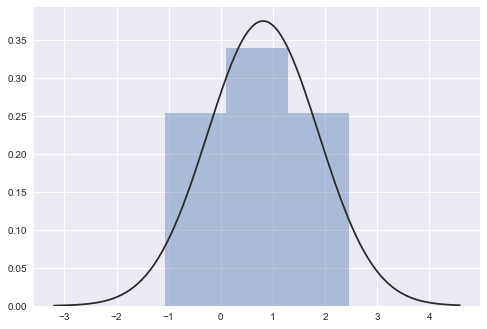

(11.316430626053437, 0.25464123584764531)

In [22]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x,kde=False,fit=sp.stats.norm)
plt.show()
x.std()
chi2var_test(x)


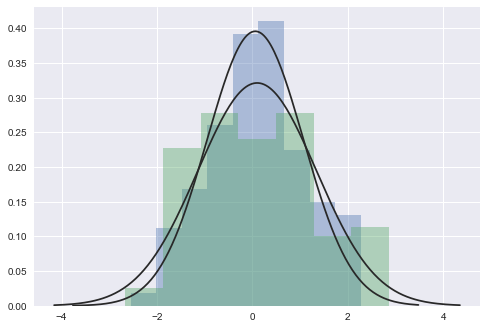

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)
FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)
LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)


In [27]:
# 등분산 검정

N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0,sigma_1).rvs(N1)
x2 = sp.stats.norm(0,sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()
print sp.stats.bartlett(x1, x2)
print sp.stats.fligner(x1, x2)
print sp.stats.levene(x1, x2)
